In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load Dataset
current_directory = os.getcwd()
print(current_directory)

/Users/verasong/MLB Predicative Model Swish


In [4]:
# Load Dataset
file_path = '/Users/verasong/MLB Predicative Model Swish/pitches'

df = pd.read_csv(file_path, delimiter=',')

/Users/verasong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# Select and clean data
raw_data = df[['inning', 'top', 'at_bat_num', 'pcount_at_bat', 'pcount_pitcher', 'pitch_type', 'b_height', 'p_throws', 'strikes', 'spin_dir', 'spin_rate']]

data = raw_data.fillna(0)

In [6]:
data.head()

,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,pitch_type,b_height,p_throws,strikes,spin_dir,spin_rate
0,1,1,1,1,1,0,5-8,R,0,0.0,0.0
1,1,1,1,2,2,0,5-8,R,0,0.0,0.0
2,1,1,1,3,3,0,5-8,R,0,0.0,0.0
3,1,1,1,4,4,0,5-8,R,1,0.0,0.0
4,1,1,2,1,5,0,5-10,R,0,0.0,0.0


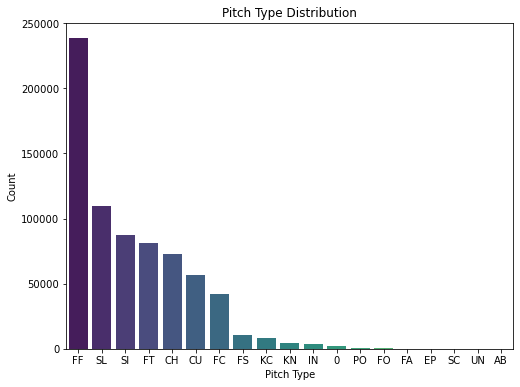

In [7]:
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="pitch_type", order=data["pitch_type"].value_counts().index, palette="viridis")
plt.title("Pitch Type Distribution")
plt.xlabel("Pitch Type")
plt.ylabel("Count")
plt.show()

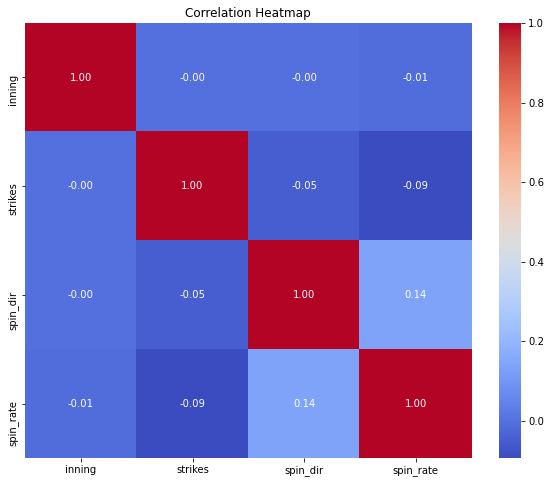

In [8]:
# Correlation heatmap for numerical features
numerical_features = ["inning", 'strikes', "spin_dir", 'spin_rate', 'p_throws']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Encode categorical variables
encoded_data_X = pd.get_dummies(data, columns=['b_height', 'p_throws'], drop_first=True)

In [10]:
# Encode categorical variables
clean_data = data['pitch_type'].replace({
    #'NA': 0,
    'FF': 1, 
    'SL': 2, 
    'CU': 3, 
    'SI': 4, 
    'FC': 5, 
    'FT': 6, 
    'KC': 7, 
    'CH': 8, 
    'IN': 9, 
    'KN': 10,
    'FS': 11, 
    'FA': 12, 
    'PO': 13, 
    'FO': 14, 
    'EP': 15, 
    'UN': 16, 
    'SC': 17, 
    'AB': 18
})

In [ ]:
clean_data.unique()

In [11]:
# Split the data into features and target
X = encoded_data_X.drop(columns=['pitch_type'])
#X = encoded_data_X.drop(columns=['inning', 'top', 'at_bat_num', 'pcount_at_bat', 'pcount_pitcher', 'pitch_type', 'strikes', 'spin_dir', 'spin_rate'])
y = clean_data

In [ ]:
y.unique()

In [12]:
# Split into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Model Building
model =  RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Model Evaluation
predictions = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

/Users/verasong/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       442
           1       0.75      0.86      0.80     47610
           2       0.69      0.83      0.75     22037
           3       0.74      0.79      0.76     11367
           4       0.48      0.51      0.50     17489
           5       0.55      0.30      0.39      8345
           6       0.45      0.36      0.40     16299
           7       0.36      0.02      0.03      1713
           8       0.48      0.43      0.45     14472
           9       0.65      0.18      0.28       797
          10       0.41      0.04      0.08       847
          11       0.30      0.05      0.09      2100
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00       115
          14       0.00      0.00      0.00        57
          15       0.00      0.00      0.00        32
          16       0.00      0.00      0.00         2
   

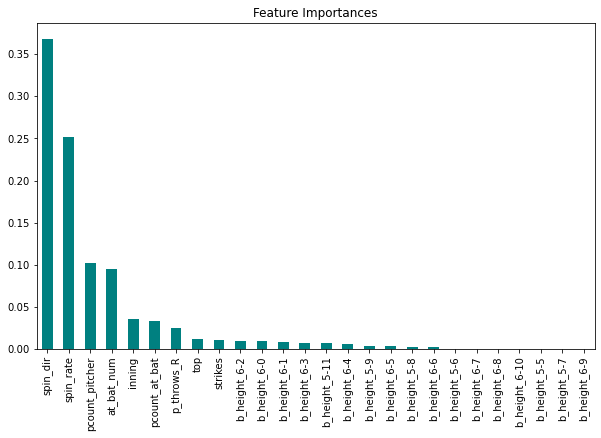

In [15]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind="bar", color="teal")
plt.title("Feature Importances")
plt.show()